In [165]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
plt.rcParams["figure.figsize"] = (16,8)

In [166]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

### Przygotowanie zbioru

In [167]:
samples, classes = make_blobs(n_samples = 10**4, centers=9, n_features=2, random_state=0, cluster_std = 1.1)
print(samples.shape)
print(classes.shape)
    
samples = StandardScaler().fit_transform(samples)

(10000, 2)
(10000,)


In [168]:
# Create color maps
cmap_bold = ListedColormap(['#7D4F69', '#37959E', '#9E8F28'])
cmap_light = ListedColormap(['#DB8AB9', '#4CD0DB', '#DBC637'])


classes = classes % 3

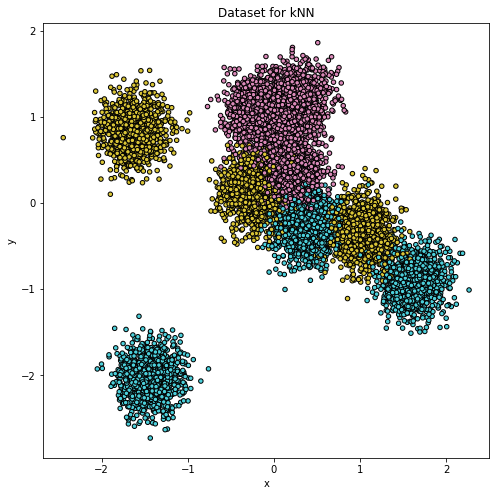

In [171]:
plt.figure(figsize=(8,8))
plt.scatter(samples[:, 0], samples[:, 1], marker='o', c=classes,
            s=20,cmap=cmap_light, edgecolor='k')
plt.title('Dataset for kNN')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Zadanie 1

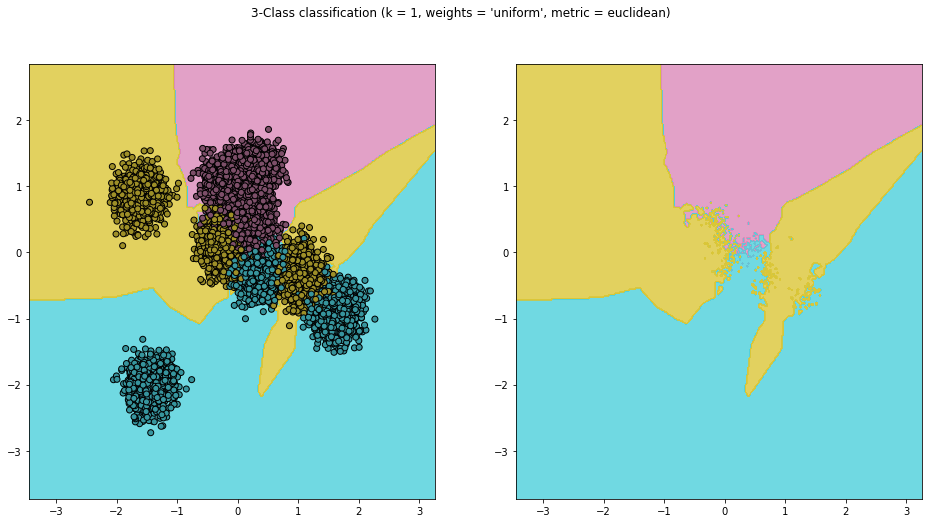

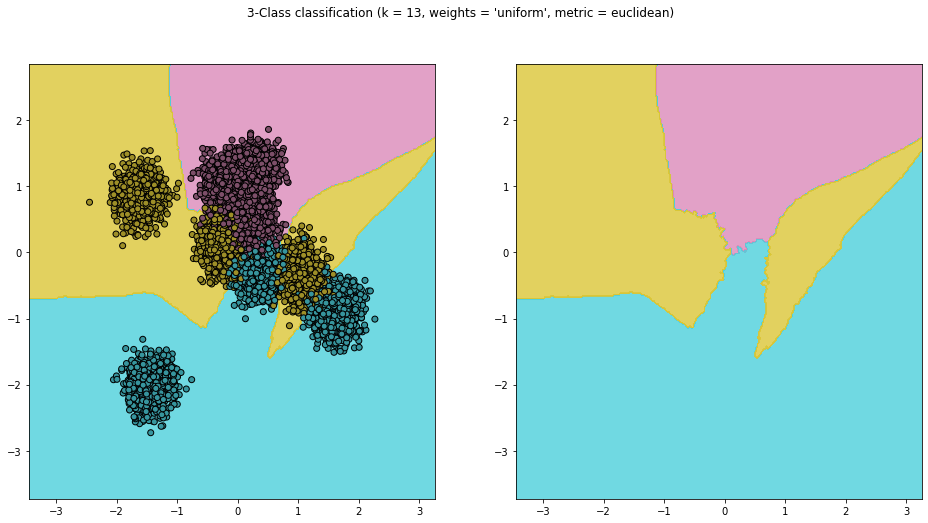

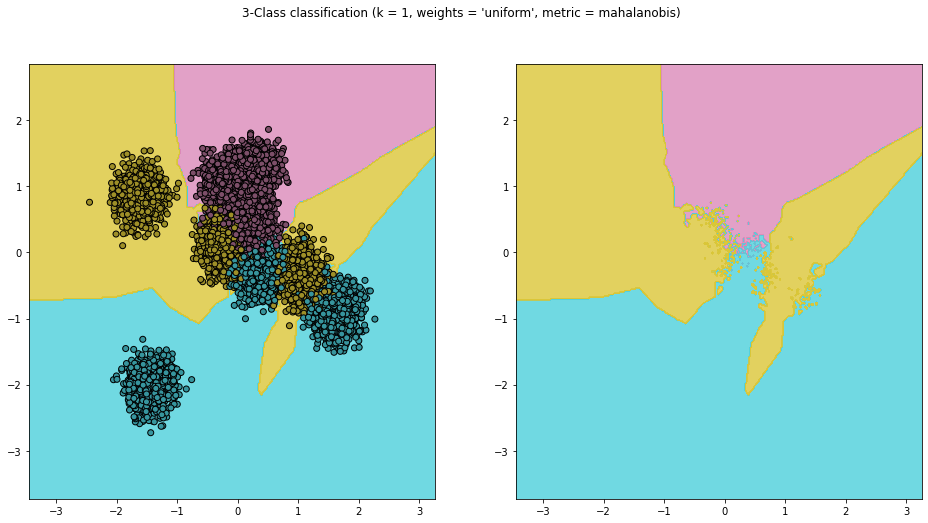

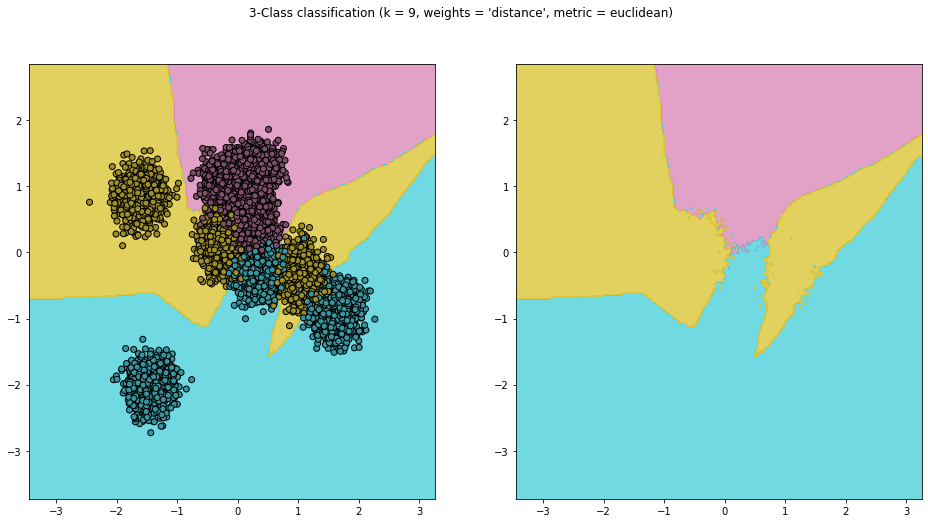

In [176]:
h = .02  # step size in the mesh

classifiers = [(1, 'auto', 'uniform', 'euclidean'),
               (13, 'auto', 'uniform', 'euclidean'),
               (1, 'brute', 'uniform', 'mahalanobis'),
               (9, 'auto', 'distance', 'euclidean')]

X,y = samples, classes

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

for cls in classifiers:
    if cls[3] == 'mahalanobis':
        clf = KNeighborsClassifier(cls[0], algorithm=cls[1], weights=cls[2], metric=cls[3], metric_params={'V': np.cov(X)})
    else:
        clf = KNeighborsClassifier(cls[0], algorithm=cls[1], weights=cls[2], metric=cls[3])
    clf.fit(X, y)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    fig.suptitle("3-Class classification (k = %i, weights = '%s', metric = %s)"
              % (cls[0], cls[2],cls[3]))
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.subplot(1, 2, 2)
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=.8)

plt.show()

### Zadanie 2

#### Wybieranie najlepszego K

In [174]:
#(1, 'brute', 'uniform', 'mahalanobis') najgorsza
#(9, 'auto', 'distance', 'euclidean') najlepsza

classifiers = [('brute', 'uniform', 'mahalanobis'), ('auto', 'distance', 'euclidean')]

X_training, X_test, y_training, y_test = train_test_split(samples, classes, test_size=.2, random_state=42)

meanAcc = np.zeros((2,20,20))
for ind, cls in enumerate(classifiers):
    for k in range (1,21):
        if cls[2] == 'mahalanobis':
            clf = KNeighborsClassifier(k, algorithm=cls[0], weights=cls[1], metric=cls[2], metric_params={'V': np.cov(X)})
        else:
            clf = KNeighborsClassifier(k, algorithm=cls[0], weights=cls[1], metric=cls[2])
        
        for i in range(20):
            X_train, X_valid, y_train, y_valid = train_test_split(X_training, y_training, test_size=.2)
            clf.fit(X_train, y_train)
            meanAcc[ind][k-1][i] = clf.score(X_valid,y_valid)
        print(k, " Done")
    

1  Done
2  Done
3  Done
4  Done
5  Done
6  Done
7  Done
8  Done
9  Done
10  Done
11  Done
12  Done
13  Done
14  Done
15  Done
16  Done
17  Done
18  Done
19  Done
20  Done
1  Done
2  Done
3  Done
4  Done
5  Done
6  Done
7  Done
8  Done
9  Done
10  Done
11  Done
12  Done
13  Done
14  Done
15  Done
16  Done
17  Done
18  Done
19  Done
20  Done


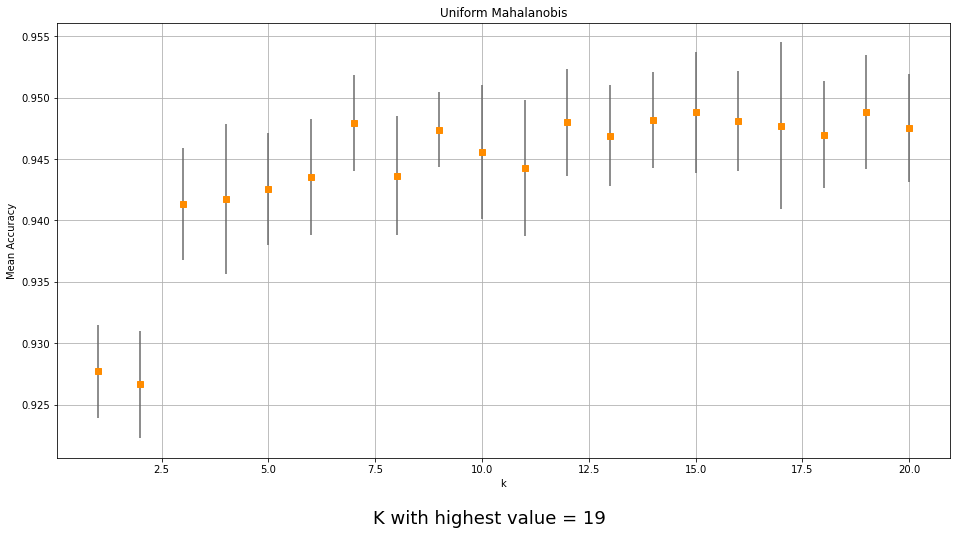

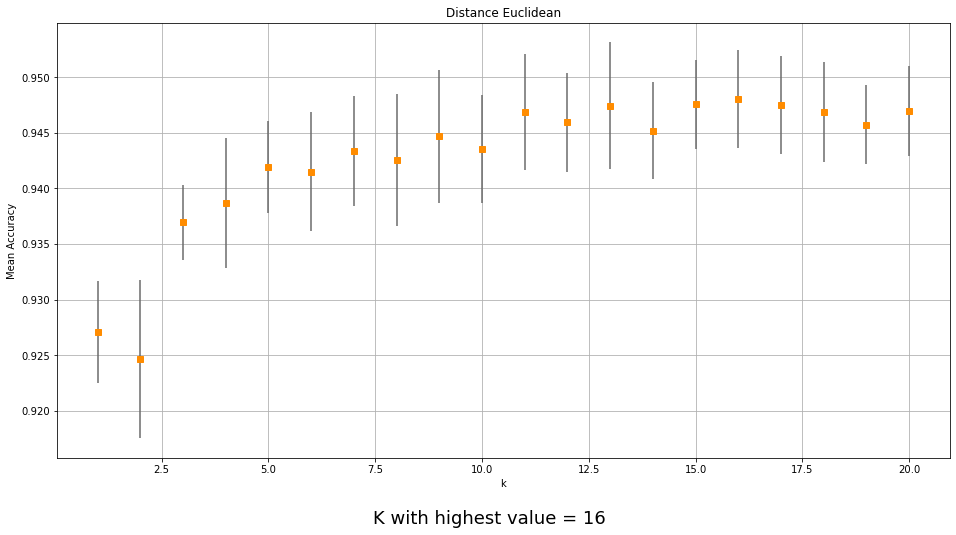

In [185]:
m = np.zeros(20)
std = np.zeros(20)
means = np.zeros((2,20))

for i,cls in enumerate(meanAcc):
    for ind, test in enumerate(cls):
        m[ind] = np.mean(test)
        std[ind] = np.std(test)
        means[i,ind] = m[ind]
        
    plt.figure()
    plt.title("Uniform Mahalanobis" if  (i == 0) else "Distance Euclidean")
    plt.xlabel("k")
    plt.ylabel("Mean Accuracy")
    plt.grid(True)
    plt.errorbar(range(1,21), m, std, fmt='o', color='darkorange', ecolor='dimgray', marker='s')
    plt.figtext(0.5, 0.01, "K with highest value = " + str(np.argmax(m) + 1), ha="center", fontsize=18)


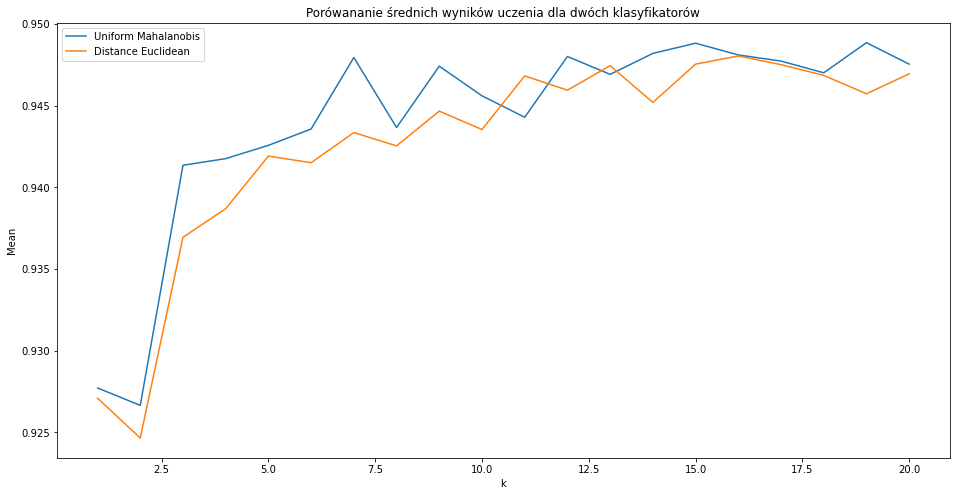

In [188]:
plt.plot(range(1,21), means[0], label = "Uniform Mahalanobis")
plt.plot(range(1,21), means[1], label = "Distance Euclidean")
plt.xlabel('k')
plt.ylabel('Mean')
plt.title('Porówananie średnich wyników uczenia dla dwóch klasyfikatorów')
plt.legend()
plt.show()
plt.show()

#### Walidacja dla najlepszego K

In [178]:
mAcc = np.zeros((2,10))
classifiers = [('brute', 'uniform', 'mahalanobis'), ('auto', 'distance', 'euclidean')]
for ind, cls in enumerate(classifiers):
    for i in range(10):
        X_training, X_test, y_training, y_test = train_test_split(samples, classes, test_size=.2)
        if cls[2] == 'mahalanobis':
            clf = KNeighborsClassifier(19, algorithm=cls[0], weights=cls[1], metric=cls[2], metric_params={'V': np.cov(X)})
        else:
            clf = KNeighborsClassifier(16, algorithm=cls[0], weights=cls[1], metric=cls[2])

        clf.fit(X_training, y_training)
        mAcc[ind][i] = clf.score(X_test,y_test)
        print(i, " Done")

0  Done
1  Done
2  Done
3  Done
4  Done
5  Done
6  Done
7  Done
8  Done
9  Done
0  Done
1  Done
2  Done
3  Done
4  Done
5  Done
6  Done
7  Done
8  Done
9  Done


In [179]:
print(mAcc)

[[0.954  0.9525 0.9435 0.9515 0.9495 0.9415 0.9475 0.945  0.9525 0.9435]
 [0.945  0.9475 0.944  0.9495 0.9435 0.9405 0.946  0.956  0.9535 0.946 ]]


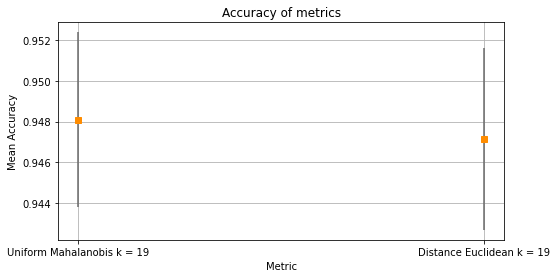

In [180]:
m2 = np.zeros(2)
std2 = np.zeros(2)

for i,cls in enumerate(mAcc):
    m2[i] = np.mean(cls)
    std2[i] = np.std(cls)
        
plt.figure(figsize=(8, 4))
plt.title("Accuracy of metrics")
plt.xlabel("Metric")
plt.ylabel("Mean Accuracy")
plt.grid(True)
x = ["Uniform Mahalanobis k = 19","Distance Euclidean k = 19"]
plt.errorbar(x, m2, std2, fmt='o', color='darkorange', ecolor='dimgray', marker='s')
plt.show()

In [181]:
print("Mean:",m2[0],"Std",std2[0])
print("Mean:",m2[1],"Std",std2[1])

Mean: 0.9480999999999999 Std 0.004276680956068619
Mean: 0.9471499999999999 Std 0.004461221805738874
